Мы будем выбирать модель среди трех моделей Йоло разных размеров. Аппликешн предполагается крутиться на бесплатном сервере хагинфейс, беспрлатный сервер предоставляет только цпу. Поэтому мы должны сравнить производительнойть моделей на цпу.

## Download YOLO models

In [1]:
import os
from dotenv import load_dotenv

APP_FOLDER = "../"
load_dotenv(os.path.join(APP_FOLDER, ".env"))

MODEL_DIR = os.getenv("MODEL_DIR")

In [2]:
from ultralytics import YOLO

# YOLO11n
model_n = YOLO(os.path.join(APP_FOLDER, MODEL_DIR, "yolo11n.pt"))

# YOLO11s
model_s = YOLO(os.path.join(APP_FOLDER, MODEL_DIR, "yolo11s.pt"))

# YOLO11l
model_l = YOLO(os.path.join(APP_FOLDER, MODEL_DIR, "yolo11l.pt"))

## Compare models

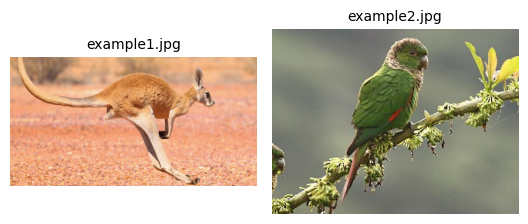

In [12]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

examples = sorted(list(Path(os.path.join(APP_FOLDER, "src/examples")).rglob("*.jpg")))

plt.figure(figsize=(8, 4))
for i, p in enumerate(examples, 1):
    img = Image.open(p).convert("RGB")
    ax = plt.subplot(1, 3, i)
    ax.imshow(img)
    ax.set_title(p.name, fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()

Модели запускаются в градио приложении, далее написаны полученные резуальты для двух примеров изображений.

In [13]:
detections_yolo11n = [{
    "class_id": 16,
    "class_name": "dog",
    "confidence": 0.44529983401298523,
    "xyxy": [
        18.356664657592773,
        40.65770721435547,
        997.4281005859375,
        615.830810546875
    ],
    "processing_time": "0.088s"
},
{
    "class_id": 14,
    "class_name": "bird",
    "confidence": 0.7441797256469727,
    "xyxy": [
      89.4562759399414,
      10.828414916992188,
      209.90463256835938,
      220.57154846191406
    ],
    "processing_time": "0.110s"
}]

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def show_images_with_xyxy(detections, images, cols=2, figsize=(8, 4)):
    n = min(len(images), len(detections))
    if n == 0:
        return

    rows = (n + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, (p, det) in enumerate(zip(images[:n], detections[:n]), 1):
        img = Image.open(p).convert("RGB")
        ax = plt.subplot(rows, cols, i)
        ax.imshow(img)

        x1, y1, x2, y2 = det["xyxy"]
        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, linewidth=2))

        ax.set_title(f'{det["class_name"]} {det["confidence"]:.2f} | {det["processing_time"]}', fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

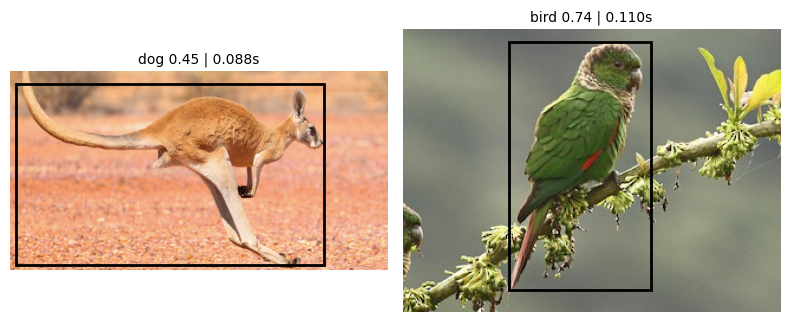

In [20]:
show_images_with_xyxy(detections_yolo11n, examples)

In [21]:
detections_yolo11s = [{
    "class_id": 16,
    "class_name": "dog",
    "confidence": 0.44529983401298523,
    "xyxy": [
        28.769872665405273,
        48.561283111572266,
        996.4822387695312,
        614.264892578125
    ],
    "processing_time": "0.145s"
},
{
    "class_id": 14,
    "class_name": "bird",
    "confidence": 0.9232264161109924,
    "xyxy": [
      85.36714172363281,
      11.631866455078125,
      204.04066467285156,
      227.29275512695312
    ],
    "processing_time": "0.172s"
}]

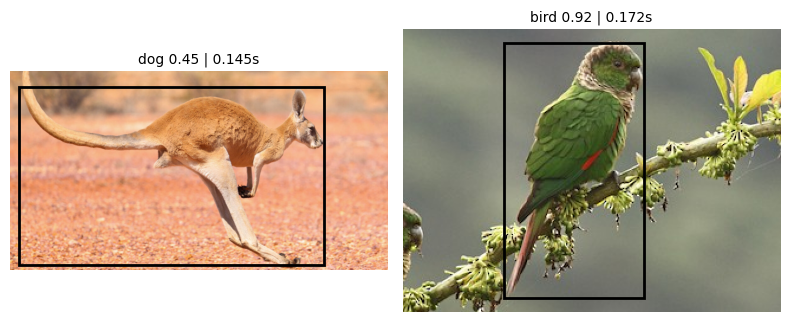

In [22]:
show_images_with_xyxy(detections_yolo11s, examples)

In [24]:
detections_yolo11l = [{
    "class_id": 16,
    "class_name": "dog",
    "confidence": 0.8340226411819458,
    "xyxy": [
      35.21049499511719,
      6.213569164276123,
      997.2978515625,
      617.4981079101562
    ],
    "processing_time": "0.624s"
},
{
    "class_id": 14,
    "class_name": "bird",
    "confidence": 0.7715820670127869,
    "xyxy": [
      82.12633514404297,
      11.384674072265625,
      204.8914794921875,
      232.6650390625
    ],
    "processing_time": "0.333s"
}]

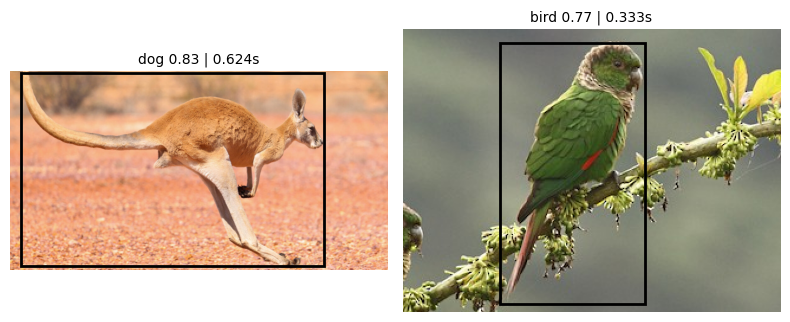

In [25]:
show_images_with_xyxy(detections_yolo11l, examples)

Просчет даже лардж модели занимает менее одной секунды на цпу. А с учетм того что это учебное приложение и не предполагает большую нагрузку, я думаю что можно использовать лардж модель для приложения парсинга чертежей.